In [ ]:
import numpy as np
import pandas as pd

#Importing the data, encoding in ISO-8859-1

dating = pd.read_csv('speeddating.csv', encoding="ISO-8859-1")

#Taking a look at the dataframe
dating.describe()
dating.dtypes

index           int64
partner_M     float64
id_M          float64
age_M         float64
field_cd_M    float64
race_M        float64
imprace_M     float64
imprelig_M    float64
goal_M        float64
date_M        float64
go_out_M      float64
career_c_M    float64
sports_M      float64
tvsports_M    float64
exercise_M    float64
dining_M      float64
museums_M     float64
art_M         float64
hiking_M      float64
gaming_M      float64
clubbing_M    float64
reading_M     float64
tv_M          float64
theater_M     float64
movies_M      float64
concerts_M    float64
music_M       float64
shopping_M    float64
yoga_M        float64
exphappy_M    float64
               ...   
fun1_1_F      float64
amb1_1_F      float64
shar1_1_F     float64
attr4_1_F     float64
sinc4_1_F     float64
intel4_1_F    float64
fun4_1_F      float64
amb4_1_F      float64
shar4_1_F     float64
attr2_1_F     float64
sinc2_1_F     float64
intel2_1_F    float64
fun2_1_F      float64
amb2_1_F      float64
shar2_1_F 

In [2]:
dating.isna().sum()

index         0
partner_M     0
id_M          0
age_M         0
field_cd_M    0
race_M        0
imprace_M     0
imprelig_M    0
goal_M        0
date_M        0
go_out_M      0
career_c_M    0
sports_M      0
tvsports_M    0
exercise_M    0
dining_M      0
museums_M     0
art_M         0
hiking_M      0
gaming_M      0
clubbing_M    0
reading_M     0
tv_M          0
theater_M     0
movies_M      0
concerts_M    0
music_M       0
shopping_M    0
yoga_M        0
exphappy_M    0
             ..
fun1_1_F      0
amb1_1_F      0
shar1_1_F     0
attr4_1_F     0
sinc4_1_F     0
intel4_1_F    0
fun4_1_F      0
amb4_1_F      0
shar4_1_F     0
attr2_1_F     0
sinc2_1_F     0
intel2_1_F    0
fun2_1_F      0
amb2_1_F      0
shar2_1_F     0
attr3_1_F     0
sinc3_1_F     0
fun3_1_F      0
intel3_1_F    0
amb3_1_F      0
attr_o_F      0
sinc_o_F      0
intel_o_F     0
fun_F         0
amb_o_F       0
shar_o_F      0
like_o_F      0
prob_o_F      0
met_F         0
match_es_F    0
Length: 127, dtype: int6

#### Deciding the attributes we don't want to use in our ML algorithm

In [62]:
X = dating.loc[:, dating.columns.difference(['match', 'like_o_F','like_o_M'])]
# Convert categorical variable into dummy/indicator variables
# Not necessary in our case
X = pd.get_dummies(X, drop_first=True)
y = dating.match

#### Normalizing (NOT NECESSARY for decision trees)

In [60]:
#from sklearn import preprocessing

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X.values)
#X = pd.DataFrame(X)

#### Dividing train and test

In [53]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import (DecisionTreeClassifier, export_graphviz)
from IPython.display import Image

%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42)

#### Training the algorithm

In [54]:
clf_not_pruned = DecisionTreeClassifier(random_state=42, criterion="entropy")

clf_not_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

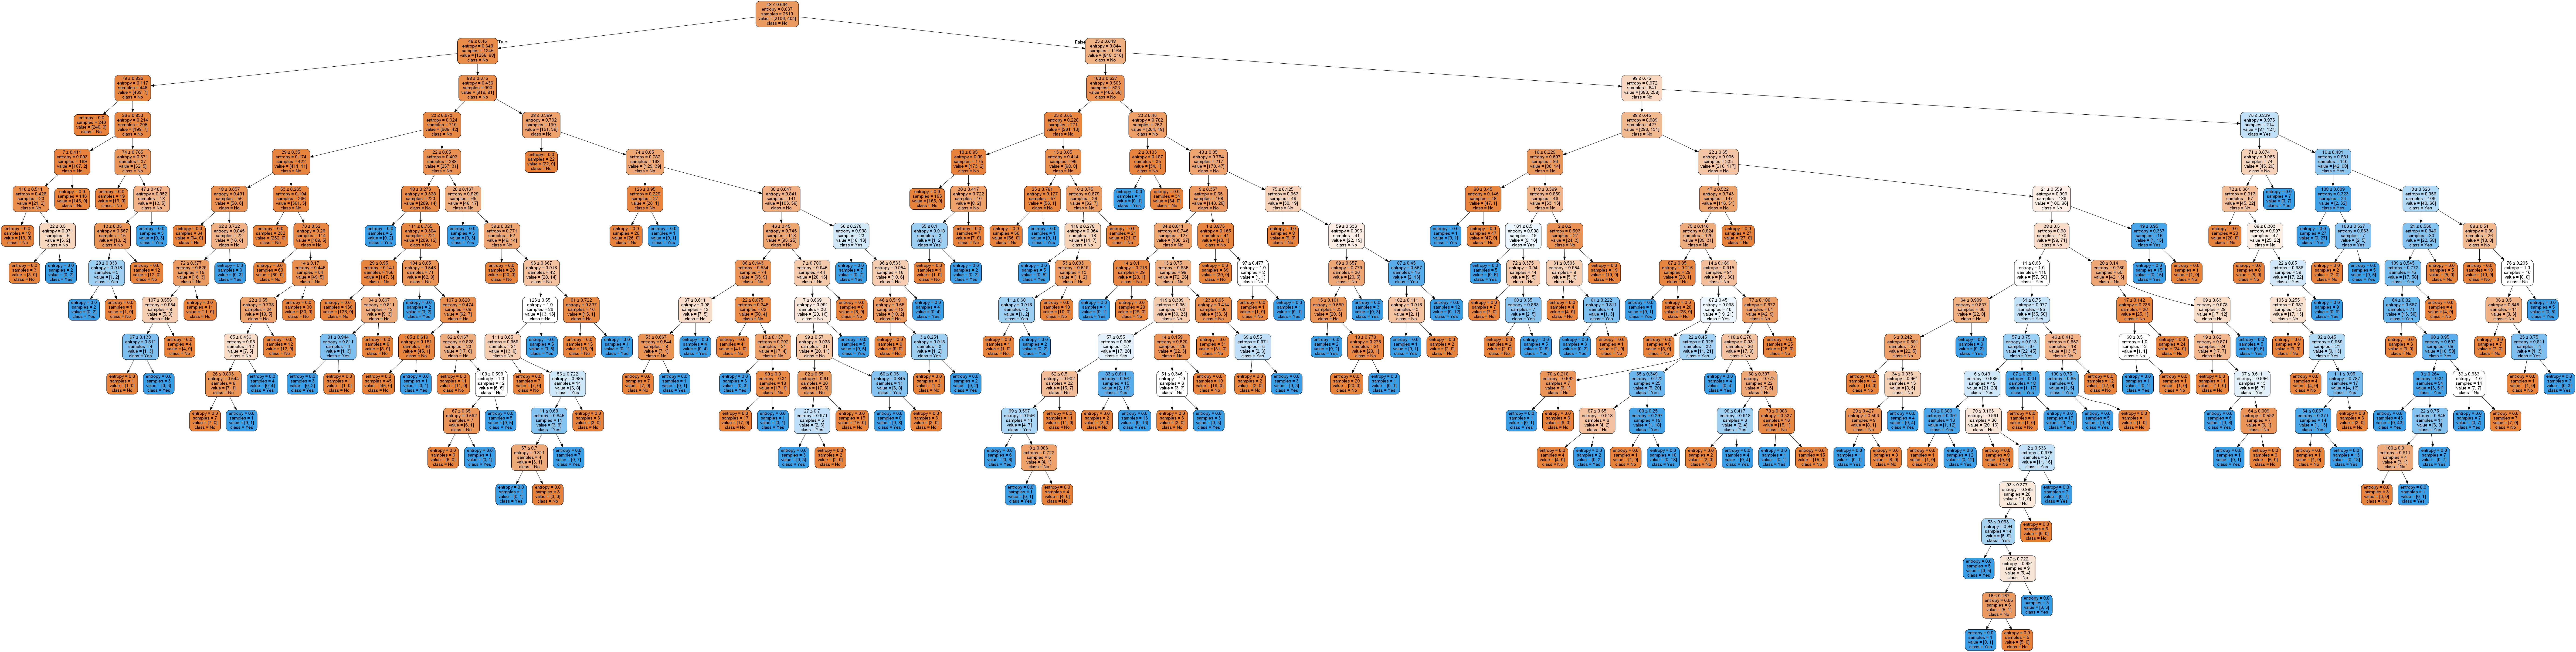

In [55]:
import pydotplus
from sklearn.externals.six import StringIO
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'
dot_data = StringIO()

export_graphviz(
    clf_not_pruned,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    class_names=["No", "Yes"],
    feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [56]:
from sklearn.metrics import (classification_report, confusion_matrix)

# Storing the predictions
y_predicted = clf_not_pruned.predict(X_test)

# Report on Classification
print("Classification Report:\n")

print(classification_report(y_true=y_test, y_pred=y_predicted))

print("Confusion Matrix:\n")

confusion_matrix_as_dataframe = pd.DataFrame(
    confusion_matrix(y_true=y_test, y_pred=y_predicted),
    columns=clf_not_pruned.classes_,
    index=clf_not_pruned.classes_)

print(confusion_matrix_as_dataframe)

Classification Report:

             precision    recall  f1-score   support

        0.0       0.88      0.88      0.88      1388
        1.0       0.41      0.40      0.40       286

avg / total       0.80      0.80      0.80      1674

Confusion Matrix:

      0.0  1.0
0.0  1224  164
1.0   173  113


In [57]:
clf_pruned = DecisionTreeClassifier(
    max_leaf_nodes=10, random_state=42, criterion="entropy")

clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

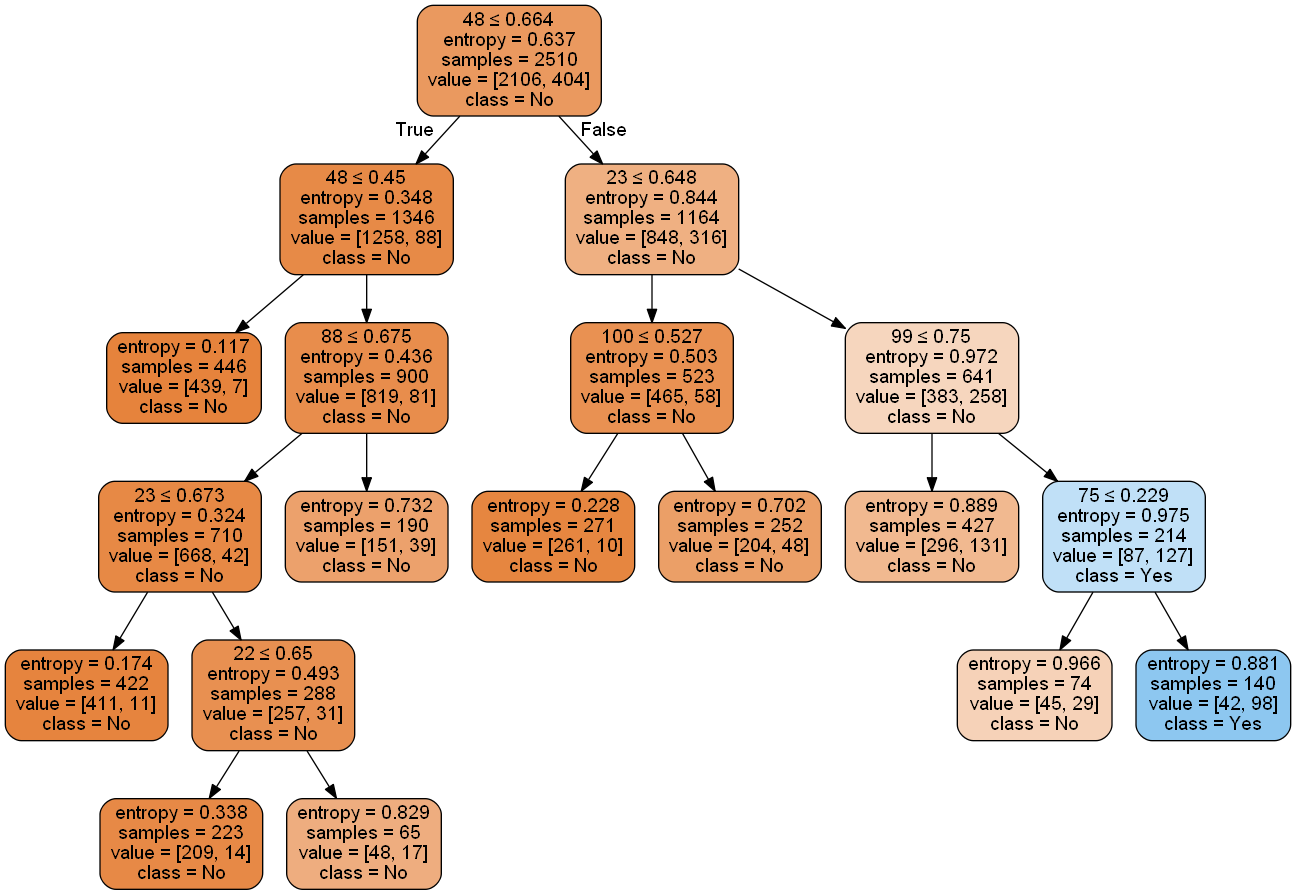

In [58]:
dot_data = StringIO()

export_graphviz(
    clf_pruned,
    out_file=dot_data,
    filled=True,
    rounded=True,
    class_names=["No", "Yes"],
    feature_names=X_train.columns,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [59]:
# Storing the predictions
y_predicted = clf_pruned.predict(X_test)

# Report on Classification
print("Classification Report:\n")

print(classification_report(y_true=y_test, y_pred=y_predicted))

print("Confusion Matrix:\n")

confusion_matrix_as_dataframe = pd.DataFrame(
    confusion_matrix(y_true=y_test, y_pred=y_predicted),
    columns=clf_not_pruned.classes_,
    index=clf_not_pruned.classes_)

print(confusion_matrix_as_dataframe)

Classification Report:

             precision    recall  f1-score   support

        0.0       0.86      0.98      0.91      1388
        1.0       0.63      0.20      0.30       286

avg / total       0.82      0.84      0.81      1674

Confusion Matrix:

      0.0  1.0
0.0  1355   33
1.0   229   57


In [50]:
clf_pruned = DecisionTreeClassifier(
    max_leaf_nodes=7, random_state=42, criterion="entropy")

clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [51]:
clf_not_pruned.feature_importances_
feature_importances_df = pd.DataFrame({
    "feature_names":
    X_train.columns,
    "feature_importances":
    clf_not_pruned.feature_importances_
}).sort_values(
    by="feature_importances", ascending=False)

feature_importances_df

,feature_names,feature_importances
48,fun_F,0.111596
23,attr_o_M,0.079343
22,attr_o_F,0.043482
100,shar_o_M,0.026866
99,shar_o_F,0.026618
88,prob_o_M,0.026289
87,prob_o_F,0.020853
75,match_es_F,0.018447
14,attr1_1_F,0.018047
69,intel3_1_F,0.016608
